In [ ]:
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, Flatten, Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras import optimizers
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import tensorflow as tf
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet50

from keras import models
from keras import layers
from keras import optimizers

image_size = 224

In [3]:
#Load the VGG model
ResNet50_conv = ResNet50(weights='imagenet') 


# Check the trainable status of the individual layers
for layer in ResNet50_conv.layers:
    print(layer.name, layer.trainable)

2022-11-16 15:12:25.149838: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 15:12:25.247439: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 15:12:25.248280: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 15:12:25.250013: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

102981632/102967424 [==============================] - 1s 0us/step
input_1 True
conv1_pad True
conv1_conv True
conv1_bn True
conv1_relu True
pool1_pad True
pool1_pool True
conv2_block1_1_conv True
conv2_block1_1_bn True
conv2_block1_1_relu True
conv2_block1_2_conv True
conv2_block1_2_bn True
conv2_block1_2_relu True
conv2_block1_0_conv True
conv2_block1_3_conv True
conv2_block1_0_bn True
conv2_block1_3_bn True
conv2_block1_add True
conv2_block1_out True
conv2_block2_1_conv True
conv2_block2_1_bn True
conv2_block2_1_relu True
conv2_block2_2_conv True
conv2_block2_2_bn True
conv2_block2_2_relu True
conv2_block2_3_conv True
conv2_block2_3_bn True
conv2_block2_add True
conv2_block2_out True
conv2_block3_1_conv True
conv2_block3_1_bn True
conv2_block3_1_relu True
conv2_block3_2_conv True
conv2_block3_2_bn True
conv2_block3_2_relu True
conv2_block3_3_conv True
conv2_block3_3_bn True
conv2_block3_add True
conv2_block3_out True
conv3_block1_1_conv True
conv3_block1_1_bn True
conv3_block1_1_rel

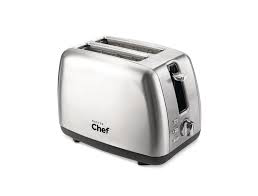

In [6]:
from PIL import Image
img = Image.open('../input/testoooo/test.jpg')
img

In [22]:
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input, decode_predictions
img = image.load_img('../input/testoooo/test.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)


In [23]:

preds =  ResNet50_conv.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n04442312', 'toaster', 0.99999964), ('n04265275', 'space_heater', 2.2045478e-07), ('n04254120', 'soap_dispenser', 9.3517954e-08)]


In [24]:
x = preprocess_input(x)
preds =  ResNet50_conv.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n04442312', 'toaster', 0.99999046), ('n04265275', 'space_heater', 4.4905532e-06), ('n04254120', 'soap_dispenser', 4.009123e-06)]


In [25]:
def generator(dir, gen=ImageDataGenerator(rescale=1./255), shuffle=True, batch_size=128, target_size=(image_size, image_size), class_mode='categorical'):

    return gen.flow_from_directory(dir, batch_size=batch_size, shuffle=shuffle, color_mode='rgb', class_mode=class_mode, target_size=target_size)


BS = 128
TS = (image_size, image_size)
train_batch = generator('../input/new-data-224/new_224_data/train',shuffle=True, batch_size=BS, target_size=TS)
valid_batch = generator('../input/new-data-224/new_224_data/val',shuffle=True, batch_size=BS, target_size=TS) 

Found 49134 images belonging to 4 classes.
Found 6141 images belonging to 4 classes.


In [62]:
ResNet50_conv = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3)) 


# Check the trainable status of the individual layers
for layer in ResNet50_conv.layers[7:]:
    layer.trainable=False
for layer in ResNet50_conv.layers:
    print(layer.name, layer.trainable)

input_4 True
conv1_pad True
conv1_conv True
conv1_bn True
conv1_relu True
pool1_pad True
pool1_pool True
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block1_2_conv False

In [86]:
model = models.Sequential()
model.add(ResNet50_conv)

In [87]:

for layer in model.layers:
    print(layer.name, layer.trainable)

resnet50 True


In [88]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_8 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100352)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 401412    
Total params: 23,989,124
Trainable params: 411,012
Non-trainable params: 23,578,112
_________________________________________________________________


In [89]:
for layer in model.layers:
    print(layer.name, layer.trainable)

resnet50 True
flatten_8 True
dropout_3 True
dense_11 True


In [90]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
              metrics=['acc'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(train_batch,
              batch_size=128,
              epochs=40,
              validation_data=valid_batch,
              callbacks=[callback])
model.save('./rez50Model.h5', overwrite=True)
np.save('./rez50Hestory.npy',history.history)

Epoch 1/40
384/384 [==============================] - 237s 608ms/step - loss: 0.1391 - acc: 0.9654 - val_loss: 0.0191 - val_acc: 0.9941
Epoch 2/40
384/384 [==============================] - 229s 596ms/step - loss: 0.0302 - acc: 0.9906 - val_loss: 0.0095 - val_acc: 0.9977
Epoch 3/40
384/384 [==============================] - 229s 596ms/step - loss: 0.0193 - acc: 0.9941 - val_loss: 0.0089 - val_acc: 0.9969
Epoch 4/40
384/384 [==============================] - 228s 594ms/step - loss: 0.0145 - acc: 0.9951 - val_loss: 0.0077 - val_acc: 0.9976
Epoch 5/40
384/384 [==============================] - 228s 593ms/step - loss: 0.0111 - acc: 0.9961 - val_loss: 0.0183 - val_acc: 0.9943
Epoch 6/40
384/384 [==============================] - 226s 589ms/step - loss: 0.0078 - acc: 0.9974 - val_loss: 0.0055 - val_acc: 0.9977
Epoch 7/40
384/384 [==============================] - 228s 594ms/step - loss: 0.0072 - acc: 0.9975 - val_loss: 0.0203 - val_acc: 0.9941
Epoch 8/40
384/384 [============================

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [91]:
train = model.evaluate(train_batch, verbose=0)
test= model.evaluate(valid_batch, verbose=0)
print(train,test)

[0.00010440311598358676, 0.9999796748161316] [0.0029529957100749016, 0.9988601207733154]


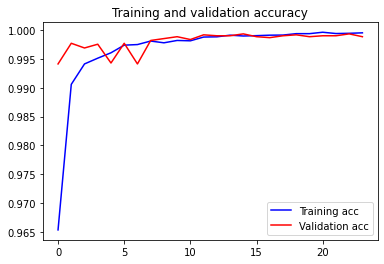

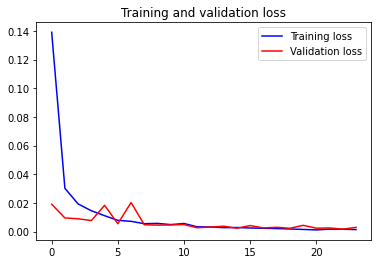

In [92]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('./reznet50Train and validation accuracy.png')
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('./reznet50Train and validation loss.png')
plt.show()

In [114]:
test_generator = ImageDataGenerator(rescale=1./255)

test_data_generator = test_generator.flow_from_directory('../input/new-data-224/new_224_data/test',
                                                         target_size=(224,224),
                                                         batch_size=32,
                                                         shuffle=False,
                                                         color_mode='rgb')

test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)
predictions = model.predict(test_data_generator, steps=test_steps_per_epoch)

Found 6145 images belonging to 4 classes.


In [115]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys()) 

In [116]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   

              precision    recall  f1-score   support

      closed       1.00      1.00      1.00      1523
     no_yawn       0.99      1.00      1.00      1529
        open       1.00      1.00      1.00      1524
        yawn       1.00      0.99      1.00      1569

    accuracy                           1.00      6145
   macro avg       1.00      1.00      1.00      6145
weighted avg       1.00      1.00      1.00      6145



In [117]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
confusion_matrix = confusion_matrix(true_classes, predicted_classes)
print(confusion_matrix)

[[1523    0    0    0]
 [   0 1528    0    1]
 [   0    0 1524    0]
 [   0    8    0 1561]]


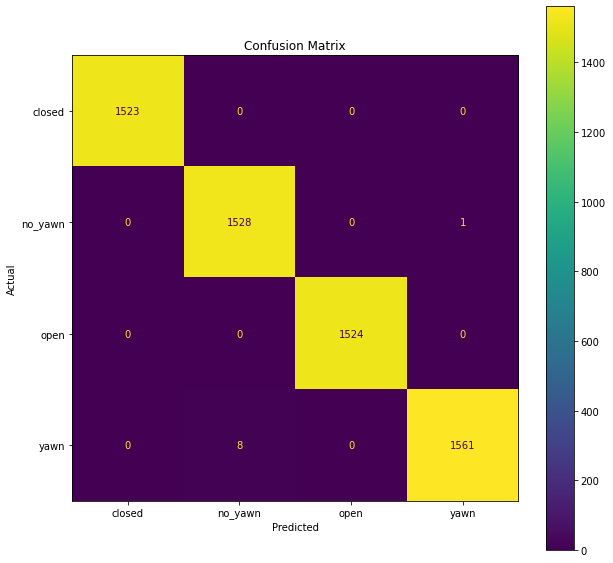

In [118]:
cmd_obj = ConfusionMatrixDisplay(confusion_matrix, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(10,10))
cmd_obj.plot(ax=ax)
cmd_obj.ax_.set(
                title='Confusion Matrix', 
                xlabel='Predicted', 
                ylabel='Actual')

plt.savefig('./confusion_matrix.png')
plt.show()